In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
%matplotlib inline

### One patient

In [2]:
datadir='/nagyvinyok/adat84/sotejedlik/ribli/expression/data/brca_rnaseq/'
datadir+='RNASeqV2/UNC__IlluminaHiSeq_RNASeqV2/Level_3/'

data=pd.read_csv(
    datadir+'unc.edu.ffd6c7c5-d4c4-4ead-9e55-de8f6aa62182.2249026.bt.exon_quantification.txt',
    sep='\t',header=0)

In [3]:
data.head()

,exon,raw_counts,median_length_normalized,RPKM
0,chr1:11874-12227:+,22,0.770538,0.436112
1,chr1:12595-12721:+,7,0.769841,0.386788
2,chr1:12613-12721:+,7,0.898148,0.450661
3,chr1:12646-12697:+,5,1.000000,0.674753
4,chr1:13221-14409:+,129,0.905724,0.761353


In [4]:
len(data)

239322

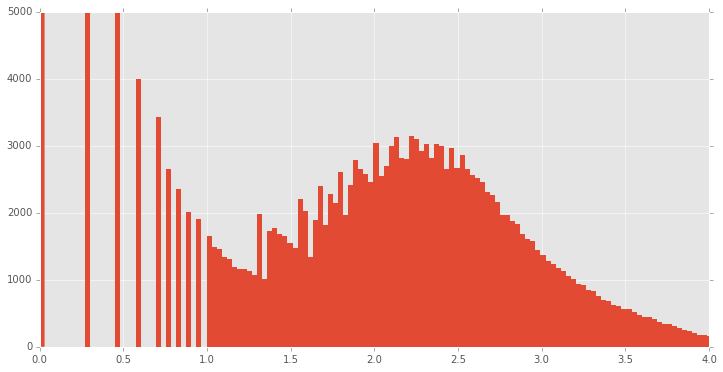

In [5]:
plt.figure(figsize=(12,6))
dump=plt.hist(np.log10(1+data.raw_counts),bins=200,edgecolor='none')
plt.ylim(0,5000)
dump=plt.xlim(0,4)

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


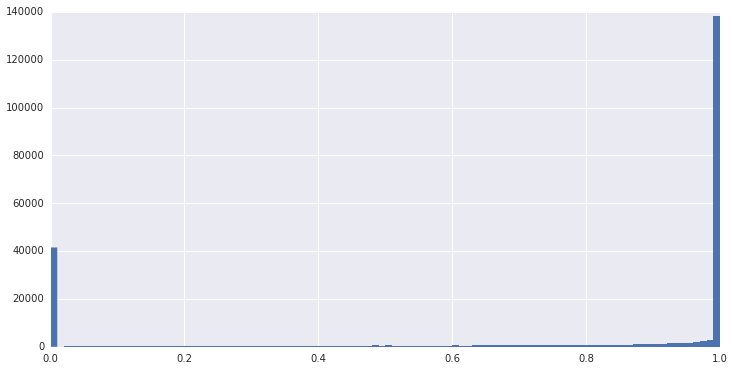

In [6]:
import seaborn as sns
plt.figure(figsize=(12,6))
dump=plt.hist(data.median_length_normalized,bins=100,edgecolor='none')

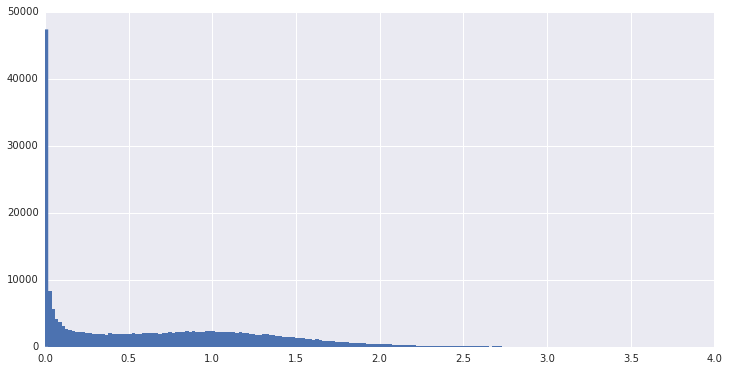

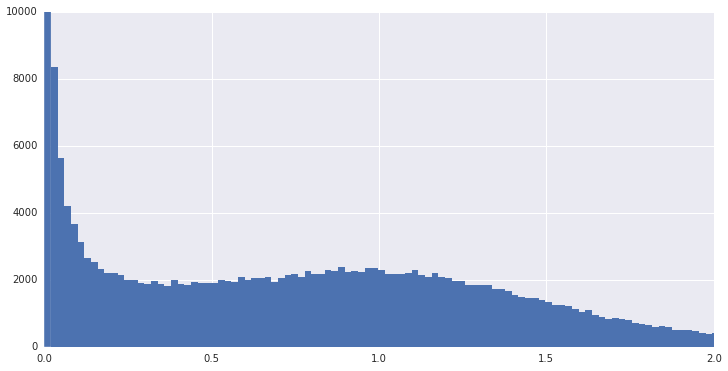

In [7]:
plt.figure(figsize=(12,6))
dump=plt.hist(np.log10(1+data.RPKM),bins=200,edgecolor='none')


plt.figure(figsize=(12,6))
dump=plt.hist(np.log10(1+data.RPKM),bins=200,edgecolor='none')
plt.ylim(0,10000)
dump=plt.xlim(0,2)

### All

In [8]:
fs_map=pd.read_csv(
    '/nagyvinyok/adat84/sotejedlik/ribli/expression/data/brca_rnaseq/FILE_SAMPLE_MAP.txt',sep='\t')
fs_map=fs_map.iloc[:-1,:]
fs_dict={}
for i in xrange(len(fs_map)):
    fs_dict[fs_map.iloc[i,0]]=fs_map.iloc[i,1]
    
    
tum_dict={}
for i in xrange(len(fs_map)):
    if ( fs_map.iloc[i,1].split('-')[3][0]=='0'):
        tum_dict[fs_map.iloc[i,0]]='tumor'
    else:
        tum_dict[fs_map.iloc[i,0]]='normal'

In [9]:
import gc
import os
from glob import glob
df_list,tum_list,norm_list=[],[],[]
fname_list=[]
gene_df=pd.DataFrame()
i=0
for filename in glob(datadir+'*exon_quantification.txt'):
    fname=os.path.basename(filename)
    fname_list.append(fname)
    
    tmp_df=pd.read_csv(filename, sep='\t',header=0)
    gene_df=tmp_df.exon
    
    df_list.append(tmp_df[['RPKM']])
    if tum_dict[fname]=='tumor':
        tum_list.append(tmp_df[['RPKM']])
    else:
        norm_list.append(tmp_df[['RPKM']])
        
    print '.',
    i+=1
    if i%100==0:
        print i,
    gc.collect()

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 200 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 300 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 400 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [10]:
data_matrix=pd.concat([gene_df]+df_list,axis=1)
n_data_matrix=pd.concat([gene_df]+norm_list,axis=1)
t_data_matrix=pd.concat([gene_df]+tum_list,axis=1)

## All exons, mean, std

In [23]:
idx=n_data_matrix.drop('exon',axis=1).mean(axis=1)!=0
print np.sum(idx)

234058


### Normal mean, std

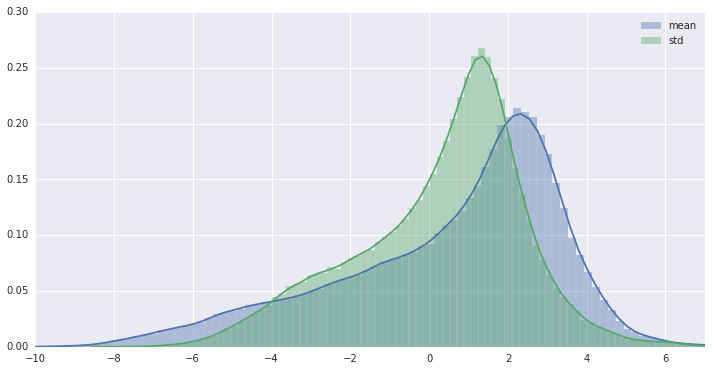

In [30]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
dump=sns.distplot(np.log(n_data_matrix.drop('exon',axis=1).mean(axis=1)[idx]),
                  hist=True,kde=True,bins=100,label='mean')
dump=sns.distplot(np.log(n_data_matrix.drop('exon',axis=1).std(axis=1)[idx]),
                  hist=True,kde=True,bins=100,label='std')
plt.xlim(-10,7)
dump=ax.legend()

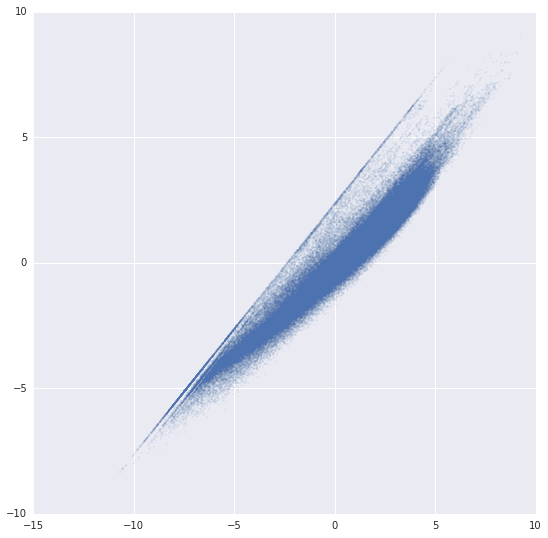

In [20]:
plt.figure(figsize=(9,9))
dump=plt.plot(np.log(n_data_matrix.drop('exon',axis=1).mean(axis=1))[idx],
              np.log(n_data_matrix.drop('exon',axis=1).std(axis=1))[idx],
              '.',ms=1)

### Tumor-normal

In [34]:
t_idx=t_data_matrix.drop('exon',axis=1).mean(axis=1)!=0

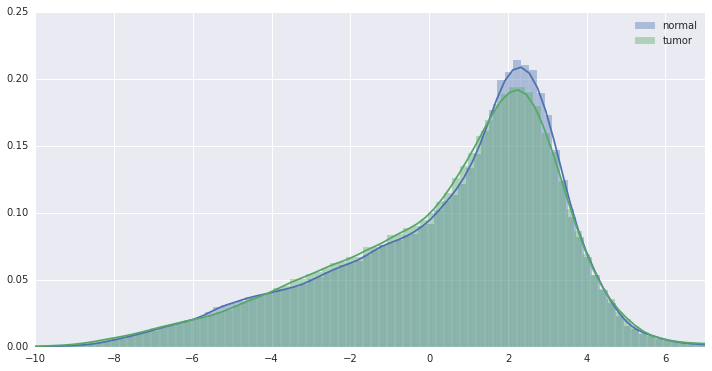

In [35]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
dump=sns.distplot(np.log(n_data_matrix.drop('exon',axis=1).mean(axis=1)[idx]),
                  hist=True,kde=True,bins=100,label='normal')
dump=sns.distplot(np.log(t_data_matrix.drop('exon',axis=1).mean(axis=1)[t_idx]),
                  hist=True,kde=True,bins=100,label='tumor')
plt.xlim(-10,7)
dump=ax.legend()

(-10, 10)

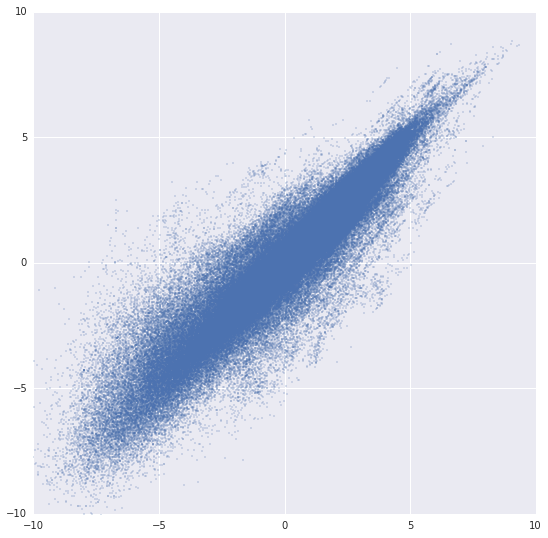

In [46]:
plt.figure(figsize=(9,9))
dump=plt.plot(np.log(n_data_matrix.drop('exon',axis=1).mean(axis=1))[idx & t_idx],
              np.log(t_data_matrix.drop('exon',axis=1).mean(axis=1))[idx & t_idx],
              '.',ms=2)
plt.xlim(-10,10)
plt.ylim(-10,10)

### Some nicer example exome

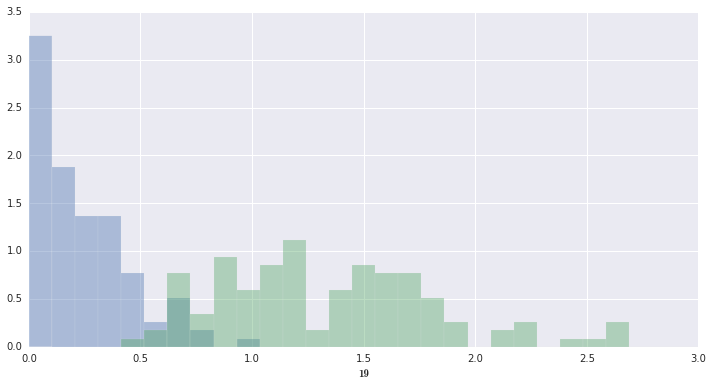

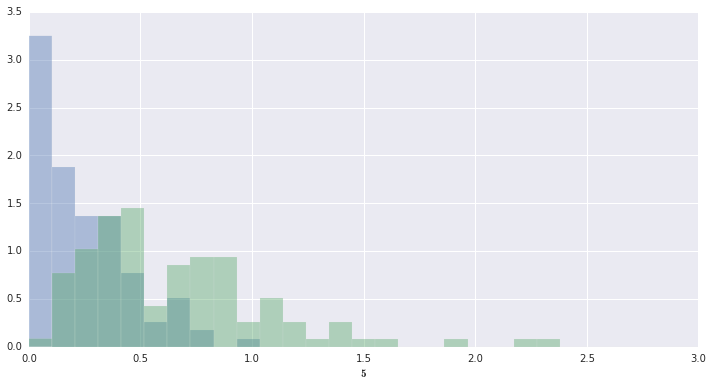

In [31]:
bins=np.linspace(0,3,30)
plt.figure(figsize=(12,6))
dump=sns.distplot((n_data_matrix.iloc[1,1:]),hist=True,kde=False,
                     bins=bins,norm_hist=True)
dump=sns.distplot((n_data_matrix.iloc[19,1:]),hist=True,kde=False,
                     bins=bins,norm_hist=True)
dump=plt.xlim(0,3)


plt.figure(figsize=(12,6))
dump=sns.distplot((n_data_matrix.iloc[1,1:]),hist=True,kde=False,
                     bins=bins,norm_hist=True)
dump=sns.distplot((n_data_matrix.iloc[5,1:]),hist=True,kde=False,
                     bins=bins,norm_hist=True)
dump=plt.xlim(0,3)